In [2]:
# Adapted from https://github.com/StephenElston/ExploringDataWithPython/blob/master/LearningDataVisualization.ipynb
import pandas as pd
import numpy as np

# Read the csv file 
auto_prices = pd.read_csv('Automobile price data.csv')

# Convert some columns into numeric values
# Replace "?" by nan
cols = ['price', 'bore', 'stroke', 'horsepower', 'peak-rpm']
for column in cols:
    try:
        auto_prices[column] = pd.to_numeric(auto_prices[column], errors='coerce')
    except Exception:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
# Remove rows with missing values
auto_prices.dropna(axis=0, inplace=True)

In [3]:
auto_prices.head()
auto_prices['price']
auto_prices['price'].dtypes

dtype('float64')

In [4]:
auto_prices.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


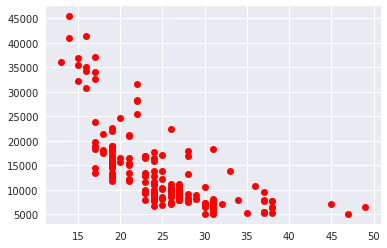

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

plt.plot(auto_prices['city-mpg'], auto_prices['price'], 'ro')

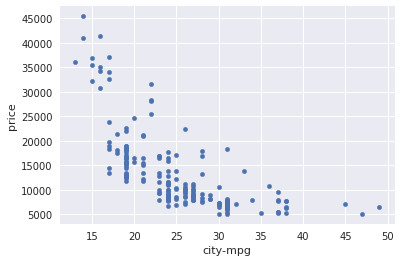

In [6]:
auto_prices.plot(kind='scatter', x='city-mpg', y='price')

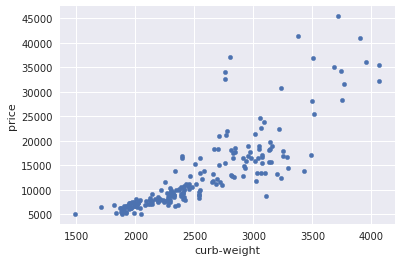

In [7]:
auto_prices.plot(kind='scatter', x='curb-weight', y='price')

Text(0,0.5,'Auto Price')

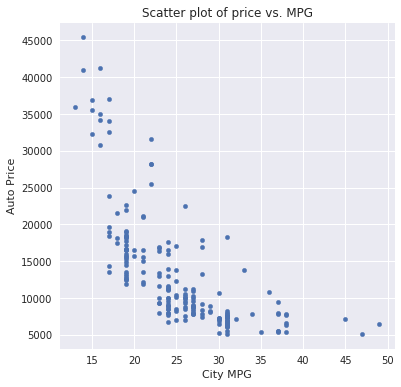

In [8]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
auto_prices.plot(kind='scatter', x='city-mpg', y='price', ax=ax)
ax.set_title('Scatter plot of price vs. MPG')
ax.set_xlabel('City MPG')
ax.set_ylabel('Auto Price')

Text(0,0.5,'Auto Price')

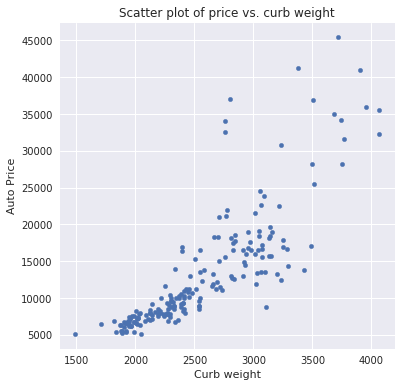

In [9]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
auto_prices.plot(kind='scatter', x='curb-weight', y='price', ax=ax)
ax.set_title('Scatter plot of price vs. curb weight')
ax.set_xlabel('Curb weight')
ax.set_ylabel('Auto Price')

In [10]:
x = list(range(100))
y = [z * z for z in range(100)]
df = pd.DataFrame({'x': x, 'y': y})

Text(0,0.5,'x^2')

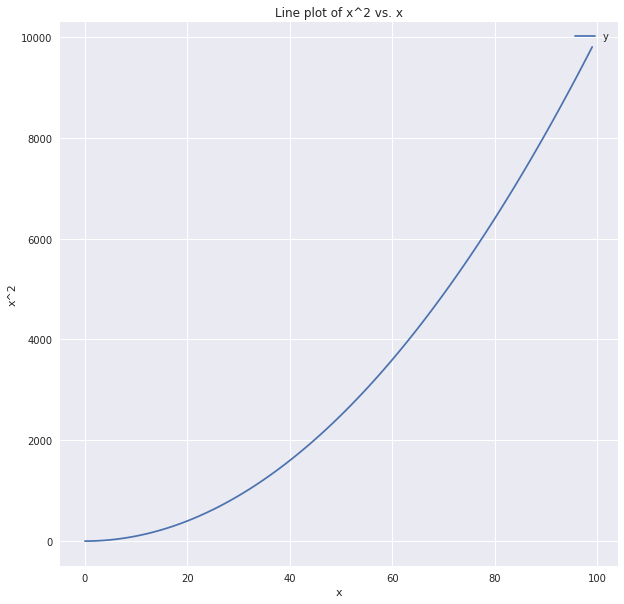

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
df.plot(x='x', y='y', ax=ax)
ax.set_title('Line plot of x^2 vs. x')
ax.set_xlabel('x')
ax.set_ylabel('x^2')

In [12]:
counts = auto_prices['make'].value_counts()
counts

toyota           32
nissan           18
mazda            13
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
saab              6
audi              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
mercury           1
Name: make, dtype: int64

Text(0,0.5,'Number of autos')

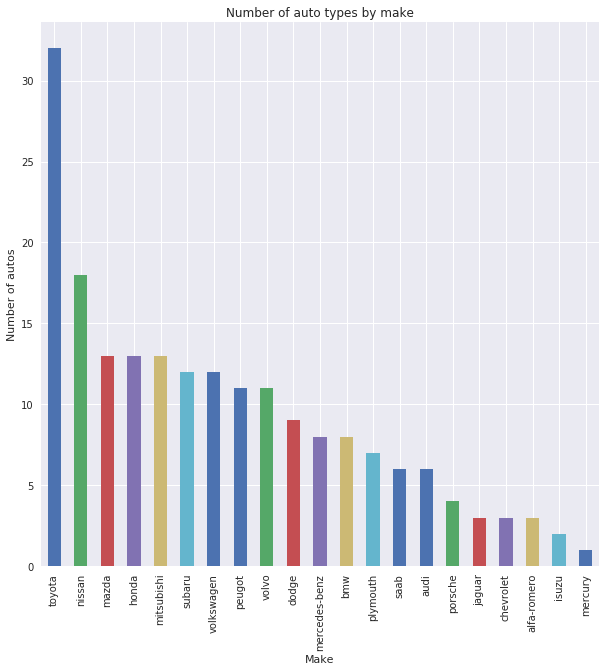

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
counts.plot.bar(ax=ax)
ax.set_title('Number of auto types by make')
ax.set_xlabel('Make')
ax.set_ylabel('Number of autos')

Text(0,0.5,'Number of autos')

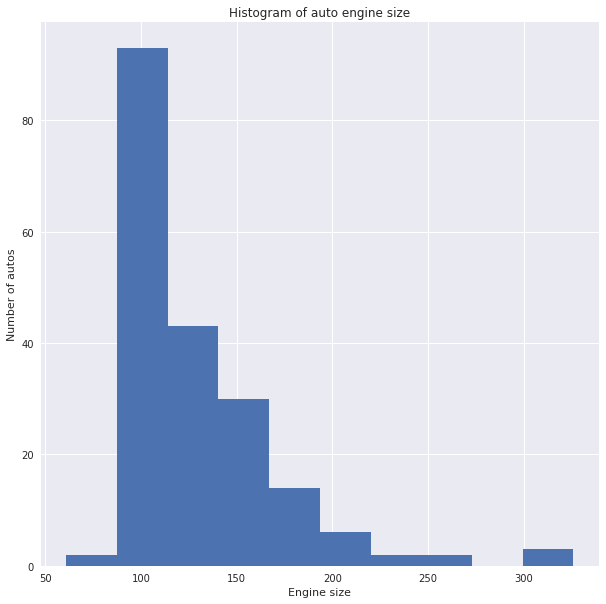

In [14]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
auto_prices['engine-size'].plot.hist(ax=ax)
ax.set_title('Histogram of auto engine size')
ax.set_xlabel('Engine size')
ax.set_ylabel('Number of autos')

Text(0,0.5,'Engine size')

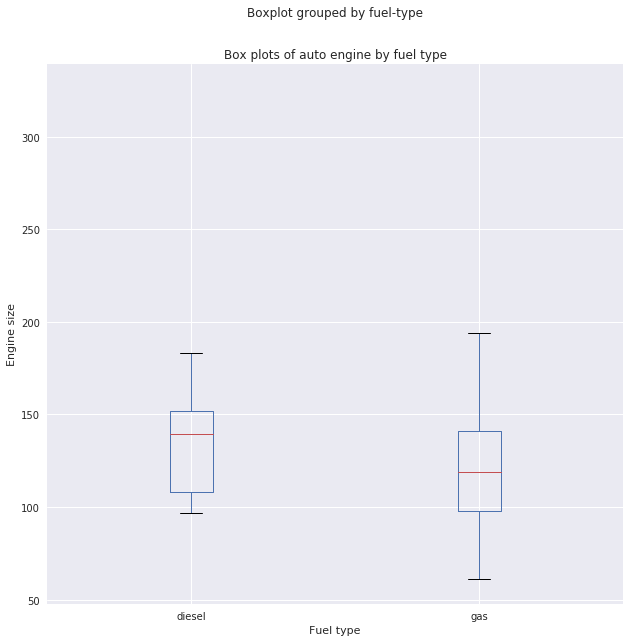

In [15]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
auto_prices[['engine-size', 'fuel-type']].boxplot(by='fuel-type', ax=ax)
ax.set_title('Box plots of auto engine by fuel type')
ax.set_xlabel('Fuel type')
ax.set_ylabel('Engine size')

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


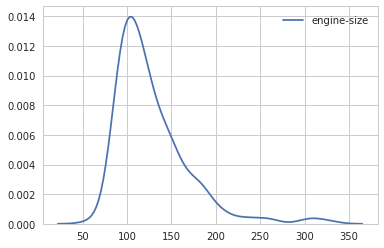

In [16]:
sns.set_style('whitegrid')
sns.kdeplot(auto_prices['engine-size'])

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

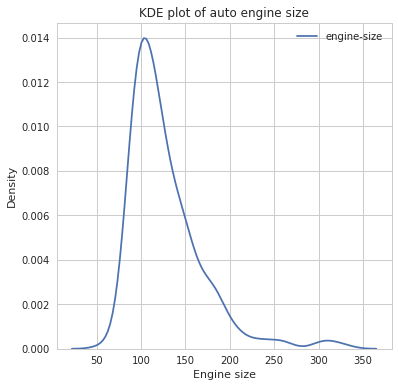

In [17]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
sns.set_style('whitegrid')
sns.kdeplot(auto_prices['engine-size'], ax=ax)
ax.set_title('KDE plot of auto engine size')
ax.set_xlabel('Engine size')
ax.set_ylabel('Density')

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Price')

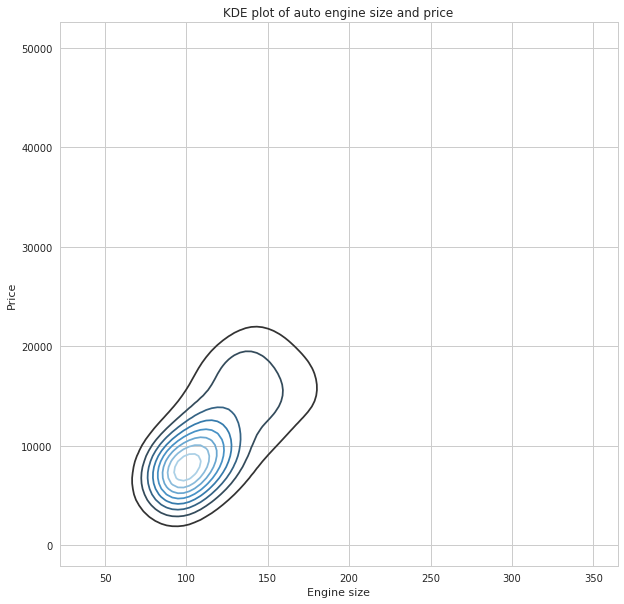

In [18]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
sns.set_style('whitegrid')
sns.kdeplot(auto_prices[['engine-size', 'price']], ax=ax, cmap='Blues_d')
ax.set_title('KDE plot of auto engine size and price')
ax.set_xlabel('Engine size')
ax.set_ylabel('Price')

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Price')

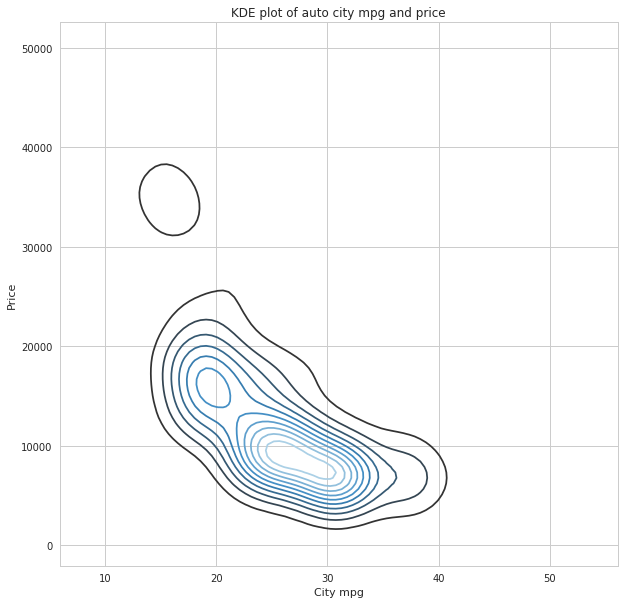

In [19]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
sns.set_style('whitegrid')
sns.kdeplot(auto_prices[['city-mpg', 'price']], ax=ax, cmap='Blues_d')
ax.set_title('KDE plot of auto city mpg and price')
ax.set_xlabel('City mpg')
ax.set_ylabel('Price')

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Fuel type')

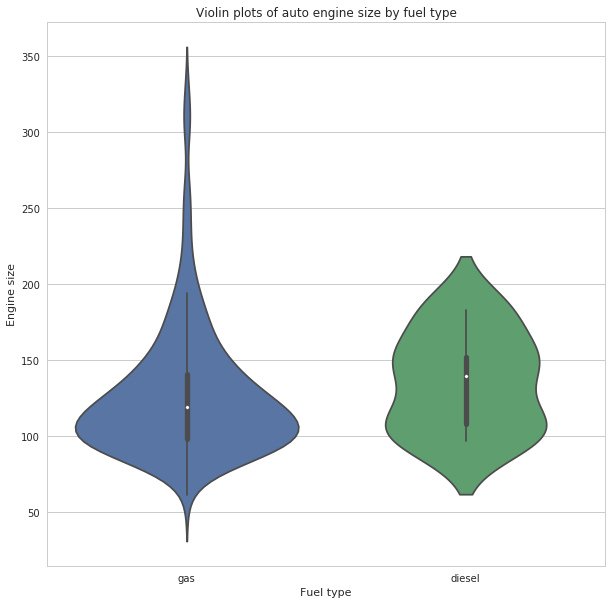

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
sns.set_style('whitegrid')
sns.violinplot(x='fuel-type', y='engine-size', data=auto_prices, ax=ax, cmap='Blues_d')
ax.set_title('Violin plots of auto engine size by fuel type')
ax.set_ylabel('Engine size')
ax.set_xlabel('Fuel type')

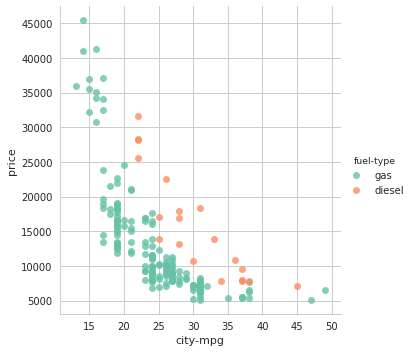

In [27]:
sns.lmplot(x='city-mpg',y='price', data=auto_prices, hue='fuel-type', palette='Set2', fit_reg=False)

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


'Done'

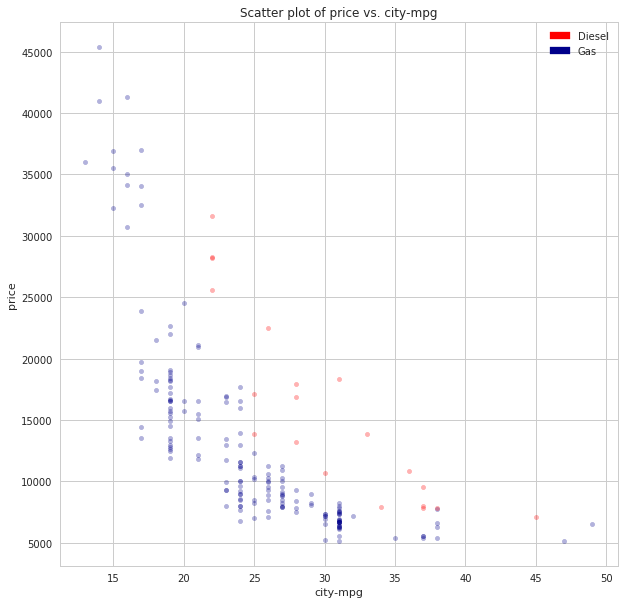

In [41]:
# Set colors and transparency
def auto_color(df, plot_cols):
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue', alpha=0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red', alpha=0.3) 
    ax.set_title('Scatter plot of price vs. ' + col)
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return 'Done'
auto_color(auto_prices, ['city-mpg'])

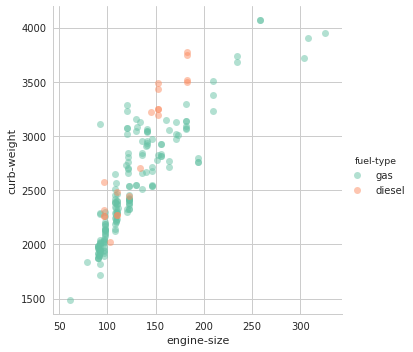

In [39]:
# Without auto_color function
sns.lmplot(x='engine-size',y='curb-weight', data=auto_prices, hue='fuel-type', palette='Set2', fit_reg=False, scatter_kws={'alpha':0.5})

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


'Done'

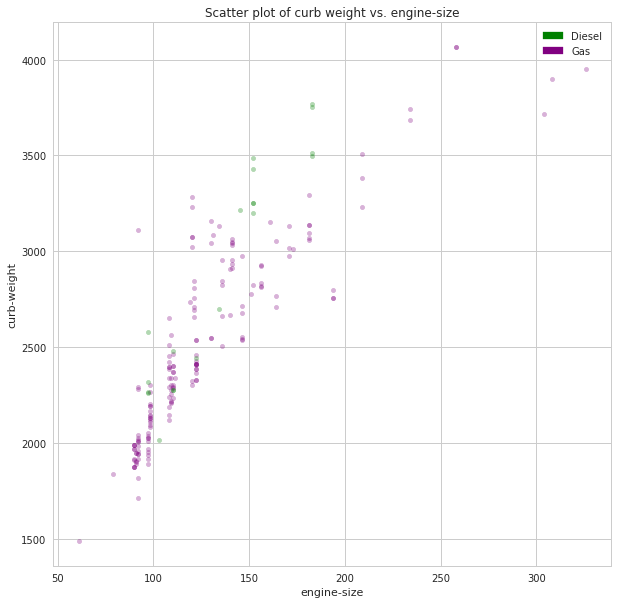

In [45]:
# With auto_color function
# Scatter plot of curb weight against engine size
def auto_color2(df, plot_cols):
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'curb-weight' , 
                           ax = ax, color = 'Purple', alpha=0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'curb-weight' , 
                           ax = ax, color = 'Green', alpha=0.3) 
    ax.set_title('Scatter plot of curb weight vs. ' + col)
    green_patch = mpatches.Patch(color='Green', label='Diesel')   
    purple_patch = mpatches.Patch(color='Purple', label='Gas')
    plt.legend(handles=[green_patch, purple_patch])
    return 'Done'
auto_color2(auto_prices, ['engine-size'])

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


'Done'

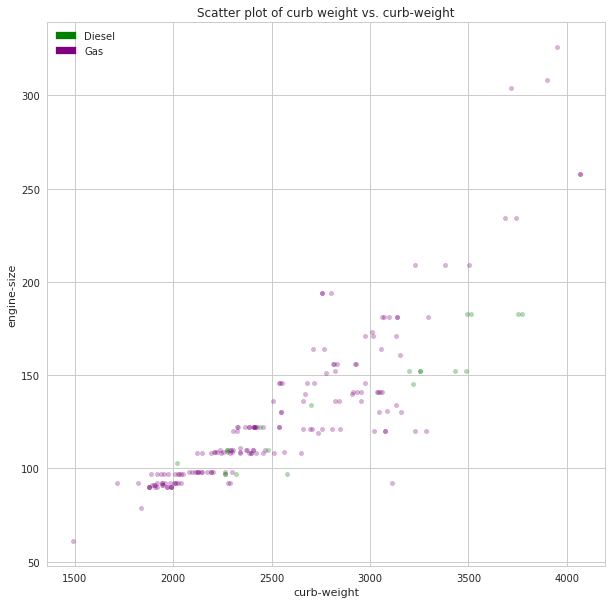

In [49]:
# With auto_color function
# Scatter plot of engine size against curb weight
def auto_color3(df, plot_cols):
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'engine-size' , 
                           ax = ax, color = 'Purple', alpha=0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'engine-size' , 
                           ax = ax, color = 'Green', alpha=0.3) 
    ax.set_title('Scatter plot of curb weight vs. ' + col)
    green_patch = mpatches.Patch(color='Green', label='Diesel')   
    purple_patch = mpatches.Patch(color='Purple', label='Gas')
    plt.legend(handles=[green_patch, purple_patch])
    return 'Done'
auto_color3(auto_prices, ['curb-weight'])



/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


'Done'

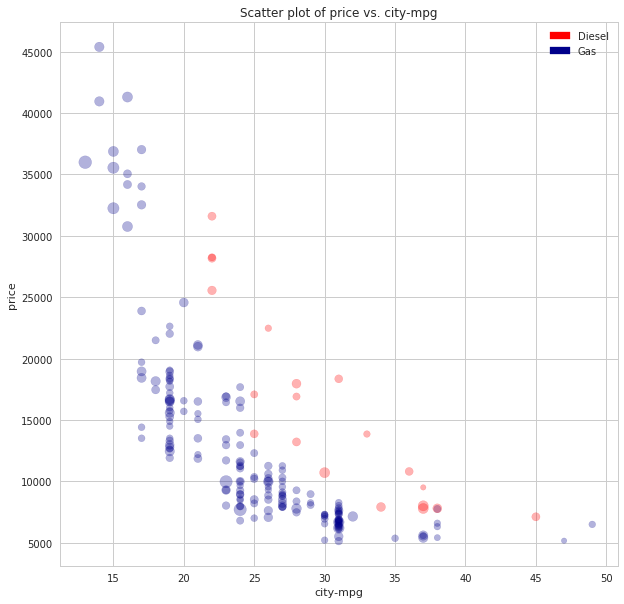

In [54]:
def auto_size(df, plot_cols):
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue', s = 0.5*auto_prices['engine-size'], alpha=0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red',s = 0.5*auto_prices['engine-size'], alpha=0.3) 
    ax.set_title('Scatter plot of price vs. ' + col)
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return 'Done'
auto_size(auto_prices, ['city-mpg'])

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


'Done'

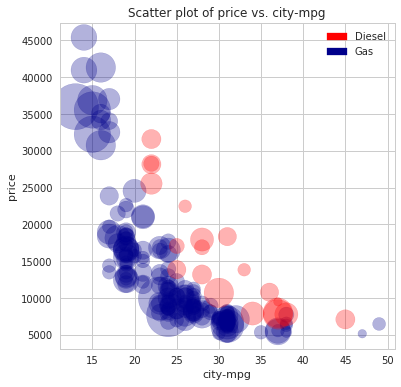

In [61]:
def auto_size2(df, plot_cols):
    import matplotlib.patches as mpatches
    for col in plot_cols:
        fig = plt.figure(figsize=(6, 6))
        ax = fig.gca()
        temp1 = df.ix[df['fuel-type'] == 'gas']       
        temp2 = df.ix[df['fuel-type'] == 'diesel']
        if temp1.shape[0] > 0:                    
            temp1.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'DarkBlue', s = 0.02*auto_prices['engine-size']*auto_prices['engine-size'], alpha=0.3)                          
        if temp2.shape[0] > 0:                    
            temp2.plot(kind = 'scatter', x = col, y = 'price' , 
                           ax = ax, color = 'Red',s = 0.02*auto_prices['engine-size']*auto_prices['engine-size'], alpha=0.3) 
    ax.set_title('Scatter plot of price vs. ' + col)
    red_patch = mpatches.Patch(color='Red', label='Diesel')   
    blue_patch = mpatches.Patch(color='DarkBlue', label='Gas')
    plt.legend(handles=[red_patch, blue_patch])
    return 'Done'
auto_size2(auto_prices, ['city-mpg'])

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


'Done'

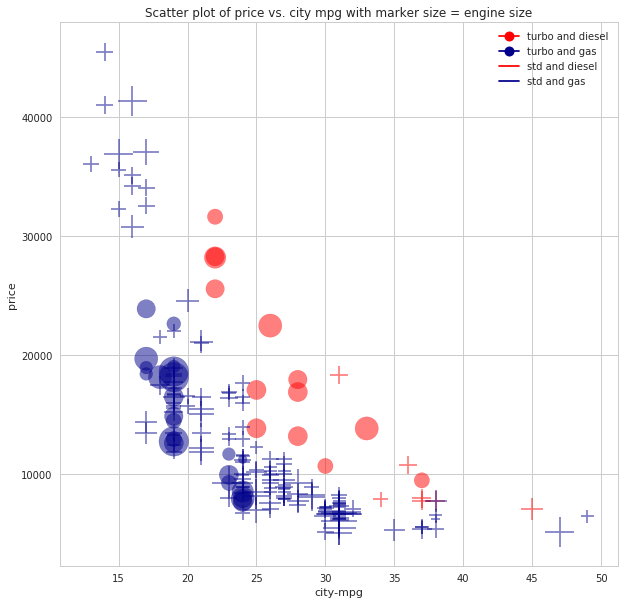

In [62]:
def auto_shape(df):
    import matplotlib.pyplot as plt
    import matplotlib.lines as mlines
    aspiration = ['turbo', 'turbo', 'std', 'std']
    fuel = ['diesel', 'gas', 'diesel', 'gas']
    mrks = ['o', 'o', '+', '+']
    cols = ['Red', 'DarkBlue', 'Red', 'DarkBlue']
    ldg = []
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()
    for asp, fl, mk, cl in zip(aspiration, fuel, mrks, cols):
        temp = df.ix[(df['aspiration'] == asp) & (df['fuel-type'] == fl)]       
        if temp.shape[0] > 0:                    
            temp.plot(kind = 'scatter', x = 'city-mpg', y = 'price' , ax = ax, color = cl, marker = mk,
                       s= .02 * df['engine-size'] * df['engine-size'], alpha = 0.5)    
        ldg.append(mlines.Line2D([], [], color=cl, marker=mk, markersize=10, 
                                 label=(asp + ' and ' + fl)))    
    ax.set_title('Scatter plot of price vs. city mpg with marker size = engine size')
    plt.legend(handles=ldg)
    return'Done'
auto_shape(auto_prices)

Text(0,0.5,'Number of autos')

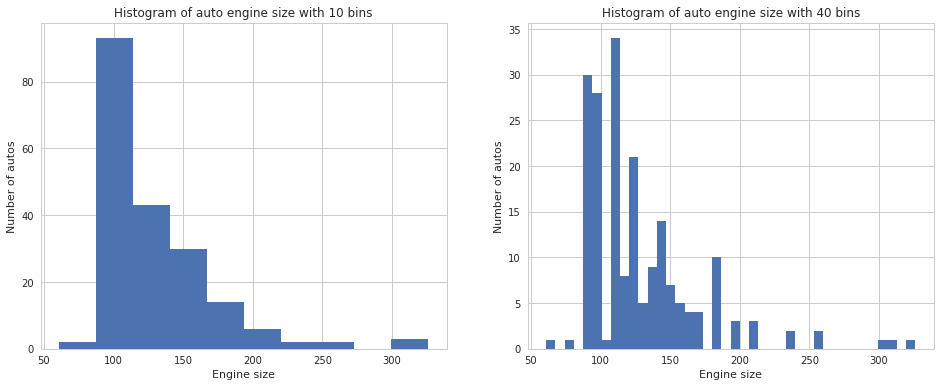

In [63]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
auto_prices['engine-size'].plot.hist(ax = ax[0]) 
ax[0].set_title('Histogram of auto engine size with 10 bins')
ax[0].set_xlabel('Engine size')
ax[0].set_ylabel('Number of autos')
auto_prices['engine-size'].plot.hist(ax = ax[1], bins = 40) 
ax[1].set_title('Histogram of auto engine size with 40 bins') 
ax[1].set_xlabel('Engine size') 
ax[1].set_ylabel('Number of autos')

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


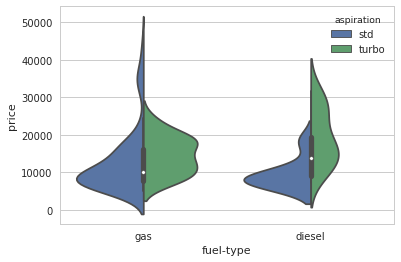

In [67]:
sns.set_style('whitegrid')
sns.violinplot(data=auto_prices, x='fuel-type', y='price', hue='aspiration', split=True)

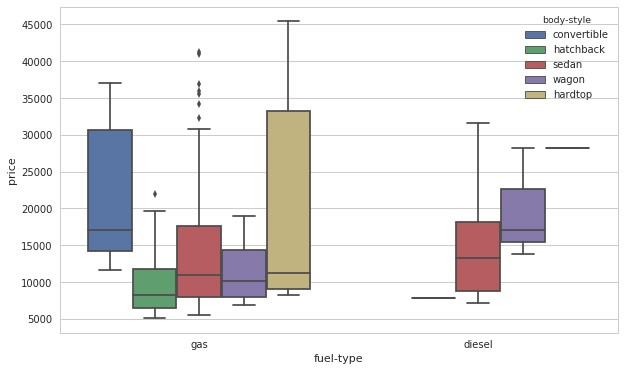

In [71]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
sns.boxplot(data=auto_prices, x='fuel-type', y='price', hue='body-style', ax=ax)

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


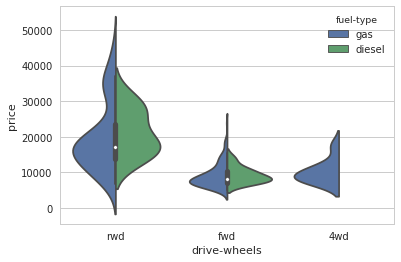

In [73]:
sns.violinplot(data=auto_prices, x='drive-wheels', y='price', hue='fuel-type', split=True)

fwd: Cheap cars for both fuel types,
rwd: Big range,
4wd: Cheap

/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/mnt/lovelace/software/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


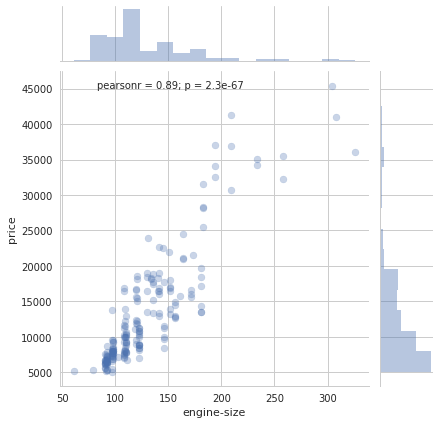

In [74]:
sns.jointplot('engine-size', 'price', data=auto_prices, alpha=0.3)

In [ ]:
num_cols = ['length', 'curb-weight', 'engine-type', 'horsepower', 'city-mpg', 'price', 'fuel-type']
sns.pairwise(auto_prices[num_cols])